# Video Search with Azure Computer Vision 4 (Florence)
## 1. Extracting frames from the video

![image](logo.jpg)

In [1]:
import cv2
import glob
import os
import time
import random
import requests
import sys
import shutil

from azure import video_details

from dotenv import load_dotenv
from IPython.display import Image
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from tqdm import tqdm
from IPython.display import Video

In [2]:
print("This notebook was made with Python 3.10.9")
sys.version

This notebook was made with Python 3.10.9


'3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]'

## 1. Directories creation

In [3]:
HOME_DIR = os.getcwd()
HOME_DIR

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/florence/Video Search'

In [4]:
VIDEO_DIR = "videos"

In [5]:
if os.path.exists(VIDEO_DIR):
    shutil.rmtree(VIDEO_DIR)

print("Creating directory")
os.makedirs(VIDEO_DIR, exist_ok=True)
print("Done")

Creating directory
Done


In [6]:
FRAMES_DIR = "frames"

In [7]:
if os.path.exists(FRAMES_DIR):
    print("Deleting the frames dir...\n")
    shutil.rmtree(FRAMES_DIR)
    print("Done")

print("Creating directory")
os.makedirs(FRAMES_DIR, exist_ok=True)
print("Done")

Deleting the frames dir...

Done
Creating directory
Done


## 2. Video file

In [8]:
os.chdir(VIDEO_DIR)

!wget https://www.dropbox.com/s/fa7r6v15hdv978h/paris.mp4

os.chdir(HOME_DIR)

--2023-05-15 11:18:18--  https://www.dropbox.com/s/fa7r6v15hdv978h/paris.mp4
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fa7r6v15hdv978h/paris.mp4 [following]
--2023-05-15 11:18:18--  https://www.dropbox.com/s/raw/fa7r6v15hdv978h/paris.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5d607b768c20dd064985b3203.dl.dropboxusercontent.com/cd/0/inline/B8EZuoMfzdTKZg12GyhJ1jXg5_buknOt24a0F6PqwX6Ib1VKJgna4ZOT8knUCed47Td1cPEGaN3FzEmIwdliROlMNzEIMe-P3ylWDbjAUMLB7scPjuURuOZh_H-cIiW8JGDdNW_UhcEESihXLDz-06GFOd2sxCJr2phfSDzL6gM9hA/file# [following]
--2023-05-15 11:18:19--  https://ucb5d607b768c20dd064985b3203.dl.dropboxusercontent.com/cd/0/inline/B8EZuoMfzdTKZg12GyhJ1jXg5_buknOt24a0F6PqwX6Ib1VKJgna4ZOT8knUCed47Td1cPEGaN3FzEmIwdliRO

In [9]:
!ls $VIDEO_DIR/paris.mp4 -lh

-rwxrwxrwx 1 root root 375M May 15 11:18 videos/paris.mp4


In [10]:
video_extensions = (".mp4", ".avi", ".mpg")

videos_list = [
    os.path.join(VIDEO_DIR, f)
    for f in os.listdir(VIDEO_DIR)
    if os.path.splitext(f)[1].lower() in video_extensions
]

videos_list

['videos/paris.mp4']

In [11]:
video_file = videos_list[0]

Video(video_file, width=860)

## 3. Extracting the frames from the video

In [12]:
duration, fps, nbframes = video_details(video_file)

Video filename: videos/paris.mp4
Video duration in secs = 1451.79 seconds
Frames per second: 29
Total number of frames: 42102


In [13]:
frame_count = 0  # do not change
duration = 0  # do not change

jpg_quality = 100  # quality percent of the jpg files

video = cv2.VideoCapture(video_file)
print("Extracting frames from the video...")

progress_bar = tqdm(total=nbframes)

while True:
    ret, frame = video.read()

    if not ret:
        break

    if frame_count % (fps) == 0:  # 1 frame per each second of the video
        hours, remainder = divmod(duration, 3600)
        minutes, seconds = divmod(remainder, 60)
        # videofile name
        cv2.putText(
            frame,
            f"{video_file}",
            (50, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 0, 255),
            2,
        )
        # timeframe
        cv2.putText(
            frame,
            f"{hours:02d} hour {minutes:02d} min {seconds:02d} secs",
            (50, 60),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 0, 255),
            2,
        )

        # Saving frames
        time_string = f"{hours:02d}_{minutes:02d}_{seconds:02d}"
        cv2.imwrite(
            FRAMES_DIR + "/" + f"frame_{time_string}.jpg",
            frame,
            [cv2.IMWRITE_JPEG_QUALITY, jpg_quality],
        )

        duration += 1

    frame_count += 1
    progress_bar.update(1)

progress_bar.close()

print("\nDone")
print("Number of processed frames =", nbframes)
print("Number of saved frames =", len(os.listdir(FRAMES_DIR)))

Extracting frames from the video...


100%|██████████| 42102/42102 [04:07<00:00, 170.32it/s]



Done
Number of processed frames = 42102
Number of saved frames = 1452


In [14]:
frames = [file for file in glob.glob(FRAMES_DIR + "/*.jpg")]

print("Number of frames =", len(frames))

Number of frames = 1452


### Some random frames from the video

frames/frame_00_10_31.jpg


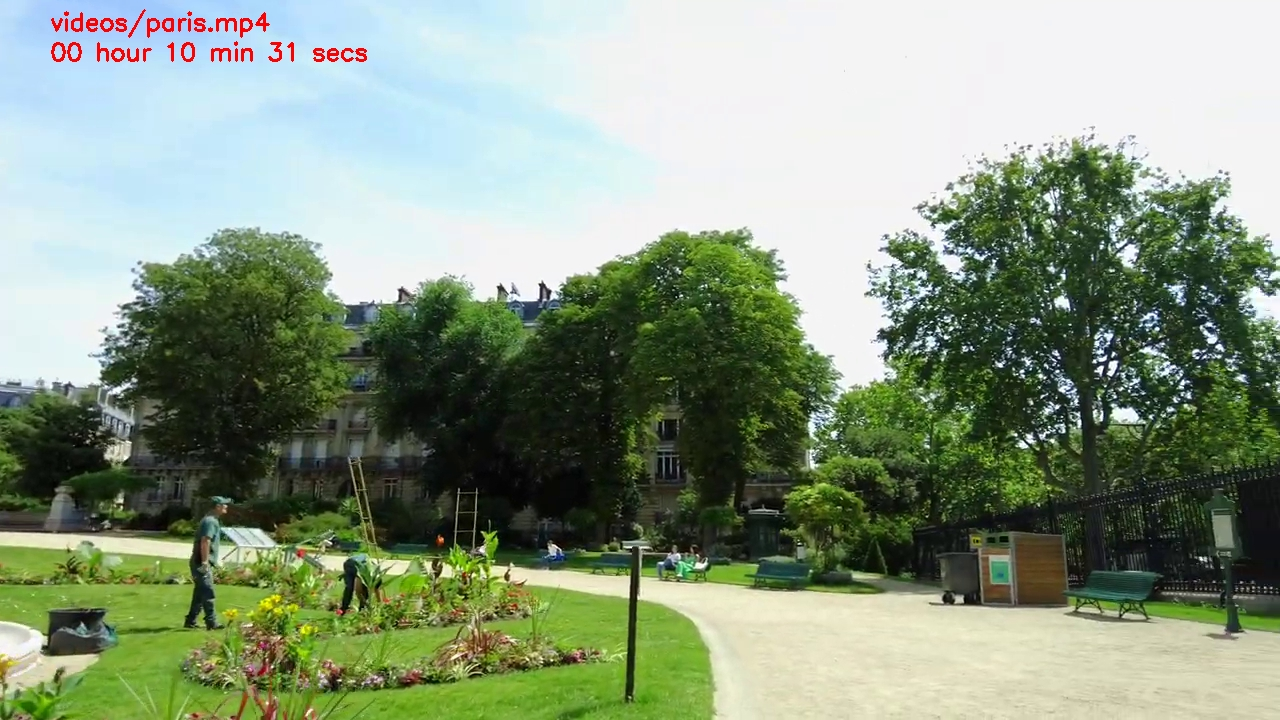

In [15]:
imageid = random.randint(0, len(frames))

print(frames[imageid])
Image(filename=frames[imageid], width=640)

frames/frame_00_02_59.jpg


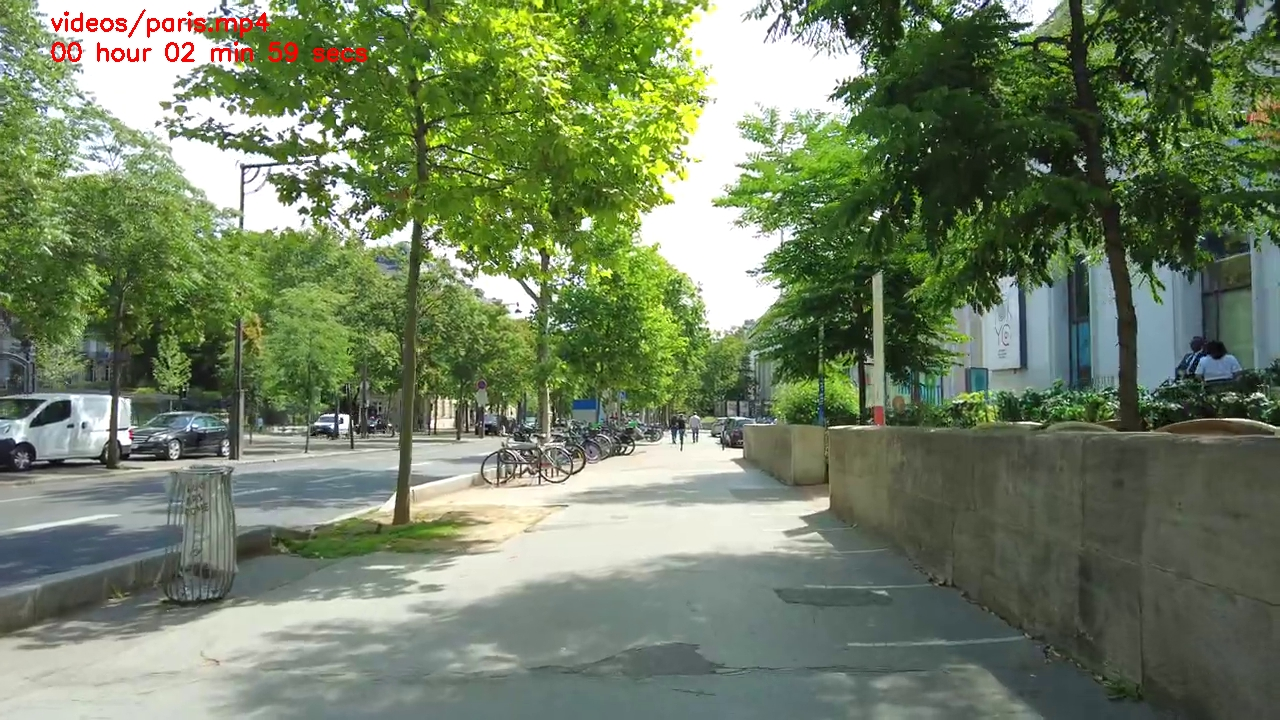

In [16]:
imageid = random.randint(0, len(frames))

print(frames[imageid])
Image(filename=frames[imageid], width=640)

frames/frame_00_09_14.jpg


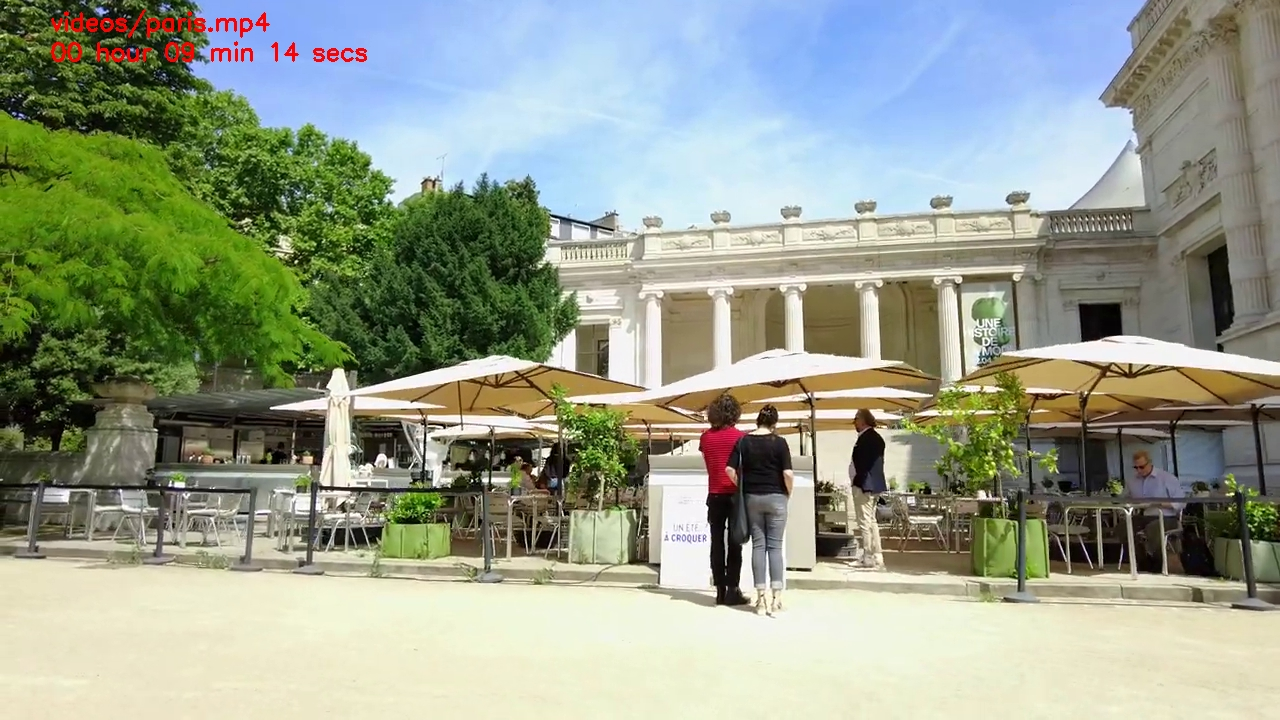

In [17]:
imageid = random.randint(0, len(frames))

print(frames[imageid])
Image(filename=frames[imageid], width=640)

frames/frame_00_03_15.jpg


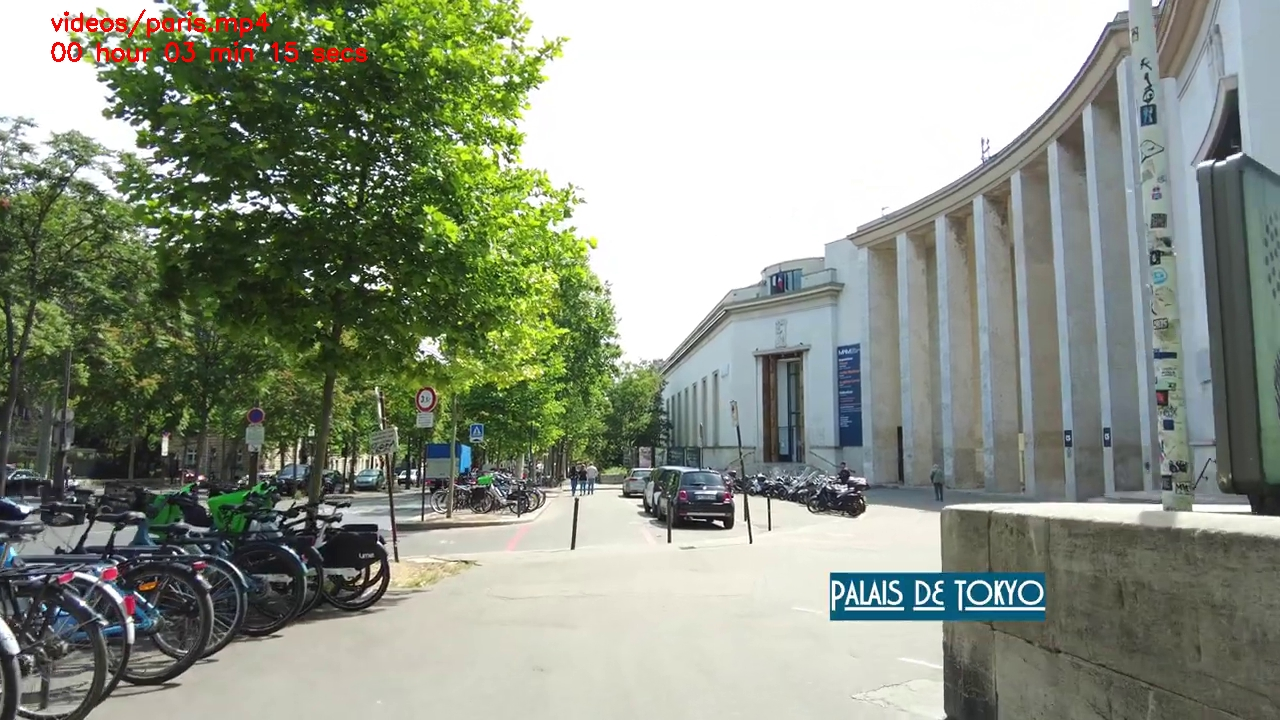

In [18]:
imageid = random.randint(0, len(frames))

print(frames[imageid])
Image(filename=frames[imageid], width=640)

frames/frame_00_19_20.jpg


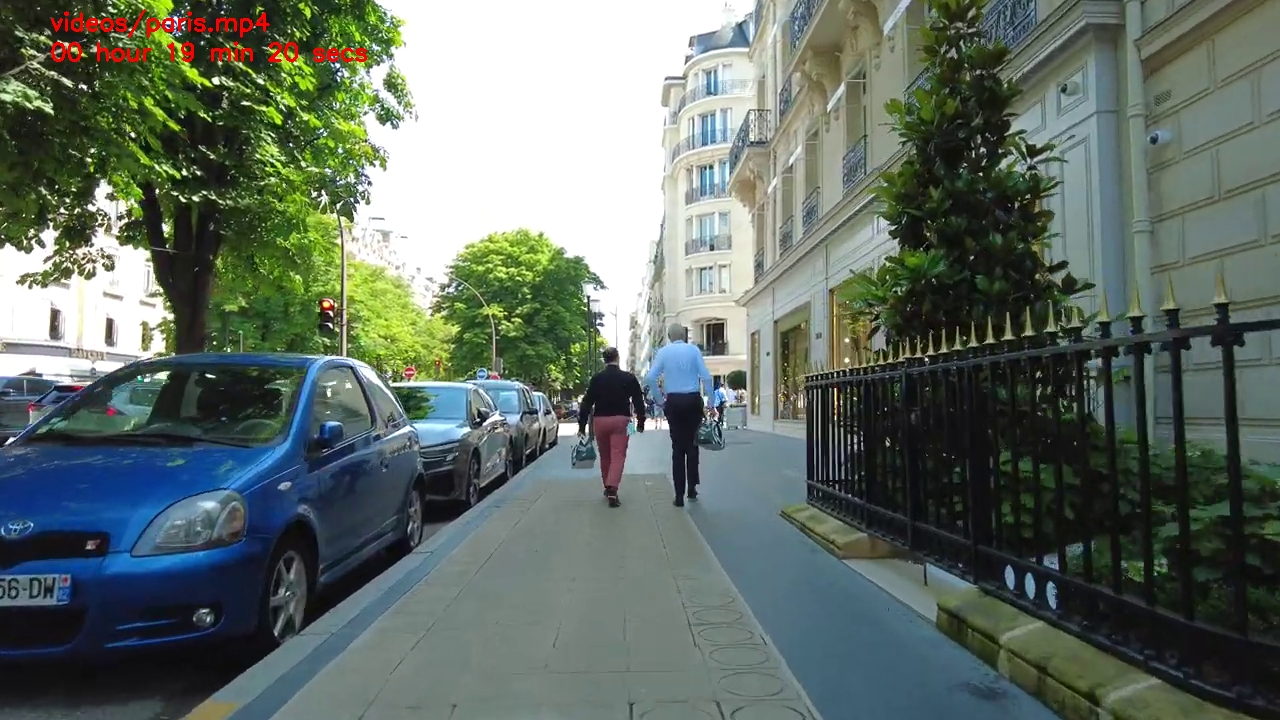

In [19]:
imageid = random.randint(0, len(frames))

print(frames[imageid])
Image(filename=frames[imageid], width=640)

## 4. Azure Computer Vision 4 (florence)

> You need to replace in the azure.env file the key and endpoint values with your Azure Computer Vision service

In [20]:
# Loading the key and endpoint for Azure Computer Vision 4
load_dotenv("azure.env")

azure_cv_key = os.getenv("azure_cv_key")
azure_cv_endpoint = os.getenv("azure_cv_endpoint")

In [21]:
features = "&features=tags,read,caption,denseCaptions,smartCrops,objects,people"

url = (
    azure_cv_endpoint
    + "/computervision/imageanalysis:analyze?api-version=2023-02-01-preview"
    + features
)

headers = {
    "Content-type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": azure_cv_key,
}

## 5. Testing Azure Computer Vision on a single frame

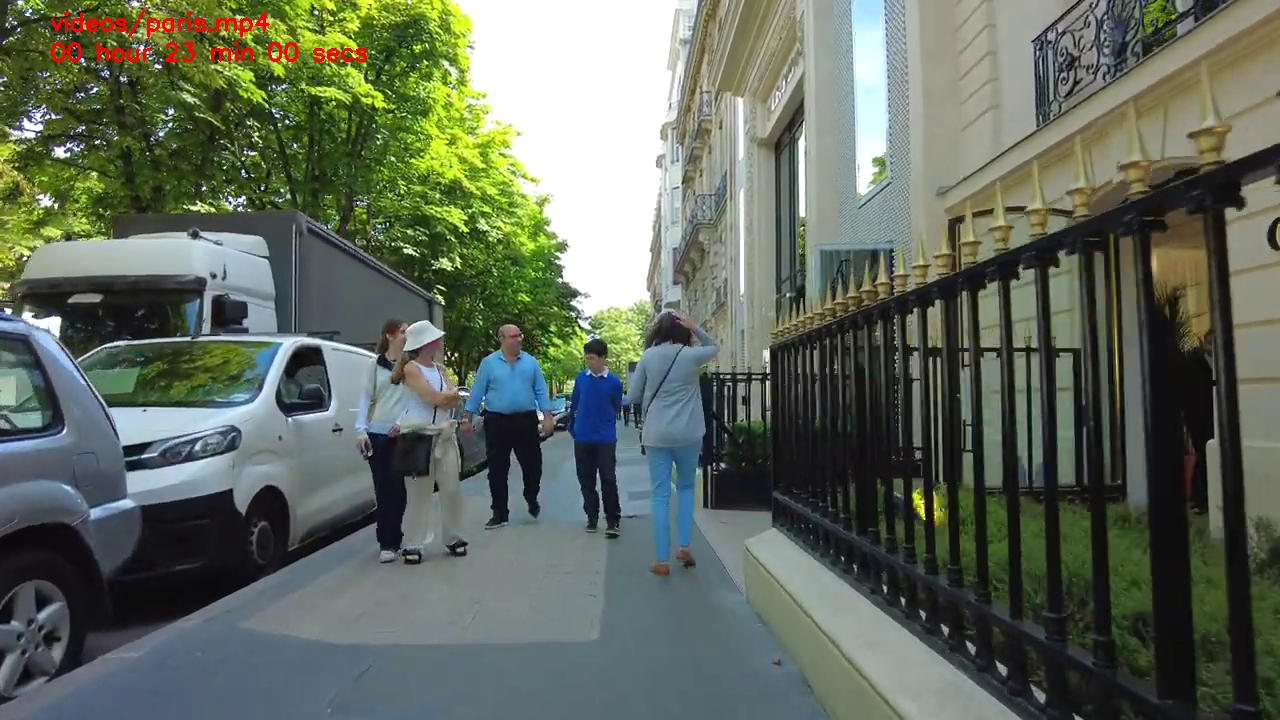

In [22]:
sample_image = "frames/frame_00_23_00.jpg"
Image(filename=sample_image, width=640)

### All results

In [23]:
with open(sample_image, "rb") as file:
    img = file.read()

results = requests.post(url, data=img, headers=headers)
results.json()

{'captionResult': {'text': 'a group of people walking down a sidewalk',
  'confidence': 0.5917034149169922},
 'objectsResult': {'values': [{'boundingBox': {'x': 477,
     'y': 332,
     'w': 80,
     'h': 195},
    'tags': [{'name': 'person', 'confidence': 0.614}]},
   {'boundingBox': {'x': 1, 'y': 549, 'w': 78, 'h': 153},
    'tags': [{'name': 'Tire', 'confidence': 0.654}]},
   {'boundingBox': {'x': 362, 'y': 322, 'w': 100, 'h': 247},
    'tags': [{'name': 'person', 'confidence': 0.638}]},
   {'boundingBox': {'x': 633, 'y': 296, 'w': 88, 'h': 285},
    'tags': [{'name': 'person', 'confidence': 0.774}]},
   {'boundingBox': {'x': 6, 'y': 290, 'w': 165, 'h': 400},
    'tags': [{'name': 'car', 'confidence': 0.572}]},
   {'boundingBox': {'x': 655, 'y': 0, 'w': 625, 'h': 712},
    'tags': [{'name': 'house', 'confidence': 0.626}]},
   {'boundingBox': {'x': 11, 'y': 0, 'w': 594, 'h': 413},
    'tags': [{'name': 'tree', 'confidence': 0.502}]},
   {'boundingBox': {'x': 11, 'y': 242, 'w': 444, '

### Caption

In [24]:
caption = results.json()["captionResult"]
caption

{'text': 'a group of people walking down a sidewalk',
 'confidence': 0.5917034149169922}

In [26]:
caption["text"]

'a group of people walking down a sidewalk'

### OCR

In [25]:
ocr = results.json()["readResult"]
ocr

{'stringIndexType': 'TextElements',
 'content': 'videos / paris.mp4\n00 hour 23 min 00 secs',
 'pages': [{'height': 720.0,
   'width': 1280.0,
   'angle': 0.4597,
   'pageNumber': 1,
   'words': [{'content': 'videos',
     'boundingBox': [53.0, 12.0, 124.0, 12.0, 124.0, 36.0, 52.0, 36.0],
     'confidence': 0.997,
     'span': {'offset': 0, 'length': 6}},
    {'content': '/',
     'boundingBox': [129.0, 12.0, 138.0, 12.0, 138.0, 36.0, 129.0, 36.0],
     'confidence': 0.941,
     'span': {'offset': 7, 'length': 1}},
    {'content': 'paris.mp4',
     'boundingBox': [143.0, 12.0, 268.0, 12.0, 269.0, 39.0, 143.0, 36.0],
     'confidence': 0.778,
     'span': {'offset': 9, 'length': 9}},
    {'content': '00',
     'boundingBox': [53.0, 42.0, 76.0, 42.0, 75.0, 62.0, 52.0, 61.0],
     'confidence': 0.432,
     'span': {'offset': 19, 'length': 2}},
    {'content': 'hour',
     'boundingBox': [92.0, 42.0, 151.0, 42.0, 151.0, 64.0, 91.0, 63.0],
     'confidence': 0.988,
     'span': {'offset': 2

In [27]:
print(ocr["content"])

videos / paris.mp4
00 hour 23 min 00 secs


### Dense captions

In [28]:
densecaptions = results.json()["denseCaptionsResult"]
densecaptions

{'values': [{'text': 'a person in a suit',
   'confidence': 0.3481992185115814,
   'boundingBox': {'x': 620, 'y': 299, 'w': 103, 'h': 276}},
  {'text': 'a person in a blue shirt',
   'confidence': 0.5133962631225586,
   'boundingBox': {'x': 561, 'y': 333, 'w': 66, 'h': 204}},
  {'text': 'a man in a blue shirt',
   'confidence': 0.5493500828742981,
   'boundingBox': {'x': 459, 'y': 316, 'w': 96, 'h': 210}},
  {'text': 'a woman holding a dog',
   'confidence': 0.40378013253211975,
   'boundingBox': {'x': 350, 'y': 311, 'w': 123, 'h': 251}},
  {'text': 'a group of people walking down a sidewalk',
   'confidence': 0.5914100408554077,
   'boundingBox': {'x': 0, 'y': 0, 'w': 1280, 'h': 720}},
  {'text': 'a close up of a car',
   'confidence': 0.5724261403083801,
   'boundingBox': {'x': 0, 'y': 300, 'w': 141, 'h': 402}},
  {'text': 'a black metal fence with gold spikes',
   'confidence': 0.3634413778781891,
   'boundingBox': {'x': 753, 'y': 129, 'w': 514, 'h': 580}},
  {'text': 'a close-up of

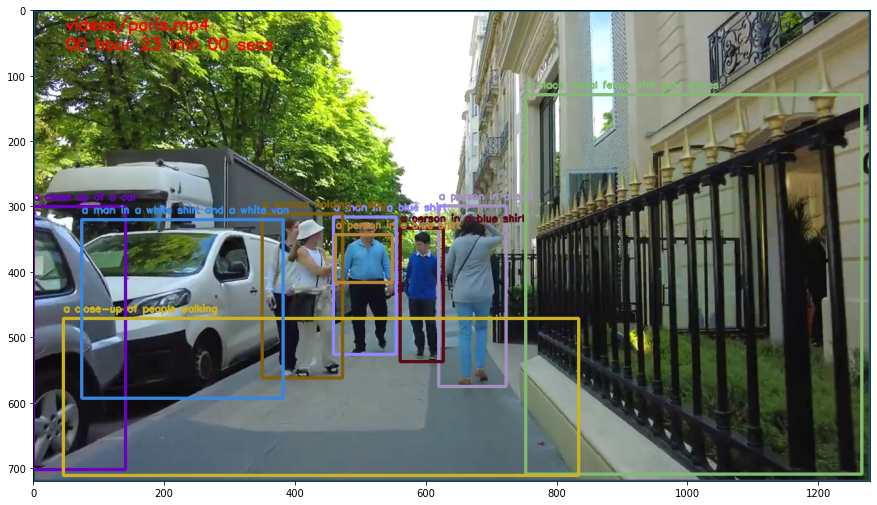

In [29]:
image = cv2.imread(sample_image)

for obj in densecaptions["values"]:
    label = obj["text"]
    x = obj["boundingBox"]["x"]
    y = obj["boundingBox"]["y"]
    w = obj["boundingBox"]["w"]
    h = obj["boundingBox"]["h"]

    col1 = random.randint(0, 255)
    col2 = random.randint(0, 255)
    col3 = random.randint(0, 255)

    cv2.rectangle(
        image,
        (x, y),
        (x + w, y + h),
        (col1, col2, col3),
        3,
    )
    cv2.putText(
        image,
        label,
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (col1, col2, col3),
        2,
    )

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Tags

In [30]:
tags = results.json()["tagsResult"]["values"]
tags

[{'name': 'outdoor', 'confidence': 0.9977284669876099},
 {'name': 'land vehicle', 'confidence': 0.9924516677856445},
 {'name': 'vehicle', 'confidence': 0.9913190603256226},
 {'name': 'footwear', 'confidence': 0.9637576937675476},
 {'name': 'clothing', 'confidence': 0.9579877853393555},
 {'name': 'building', 'confidence': 0.9495850801467896},
 {'name': 'person', 'confidence': 0.9399607181549072},
 {'name': 'wheel', 'confidence': 0.9394393563270569},
 {'name': 'tree', 'confidence': 0.928471565246582},
 {'name': 'sky', 'confidence': 0.8741514682769775},
 {'name': 'tire', 'confidence': 0.8468074798583984},
 {'name': 'car', 'confidence': 0.8373017311096191},
 {'name': 'road', 'confidence': 0.8323862552642822},
 {'name': 'street', 'confidence': 0.7168124914169312},
 {'name': 'city', 'confidence': 0.7063827514648438},
 {'name': 'sidewalk', 'confidence': 0.6862472295761108},
 {'name': 'people', 'confidence': 0.6528651118278503},
 {'name': 'group', 'confidence': 0.6447588801383972},
 {'name': '

In [32]:
for i, tag in enumerate(tags):
    tag_name = tag["name"]
    confidence = tag["confidence"]
    print(tag_name, "=", confidence)

outdoor = 0.9977284669876099
land vehicle = 0.9924516677856445
vehicle = 0.9913190603256226
footwear = 0.9637576937675476
clothing = 0.9579877853393555
building = 0.9495850801467896
person = 0.9399607181549072
wheel = 0.9394393563270569
tree = 0.928471565246582
sky = 0.8741514682769775
tire = 0.8468074798583984
car = 0.8373017311096191
road = 0.8323862552642822
street = 0.7168124914169312
city = 0.7063827514648438
sidewalk = 0.6862472295761108
people = 0.6528651118278503
group = 0.6447588801383972
standing = 0.6055235266685486


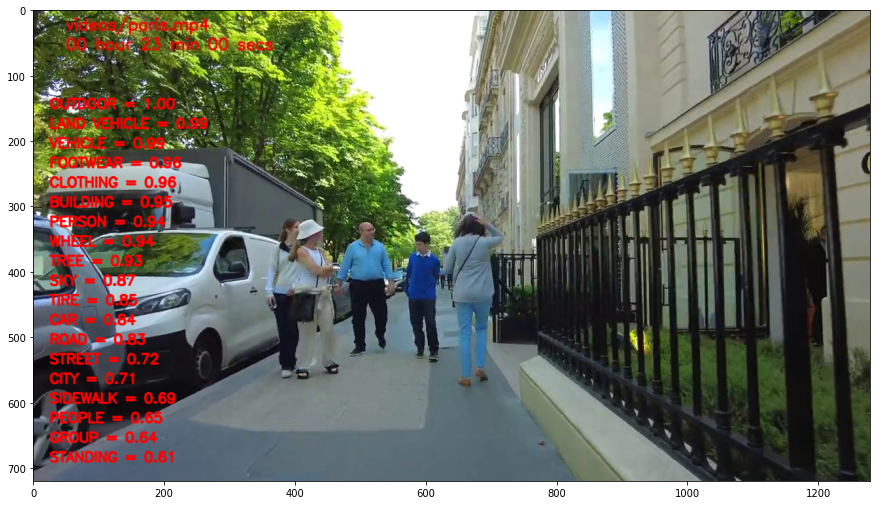

In [33]:
image = cv2.imread(sample_image)
text_position = (25, 150)

# Iterate over the tag data and display name and confidence
for i, tag in enumerate(tags):
    tag_name = tag["name"]
    confidence = tag["confidence"]

    text = f"{str.upper(tag_name)} = {confidence:.2f}"
    position = (text_position[0], text_position[1] + i * 30)

    cv2.putText(
        image,
        text,
        position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 0, 255),
        2,
        cv2.LINE_AA,
    )

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Smart Crop

In [34]:
crop = results.json()["smartCropsResult"]
crop["values"]

[{'aspectRatio': 2.0, 'boundingBox': {'x': 53, 'y': 150, 'w': 960, 'h': 480}}]

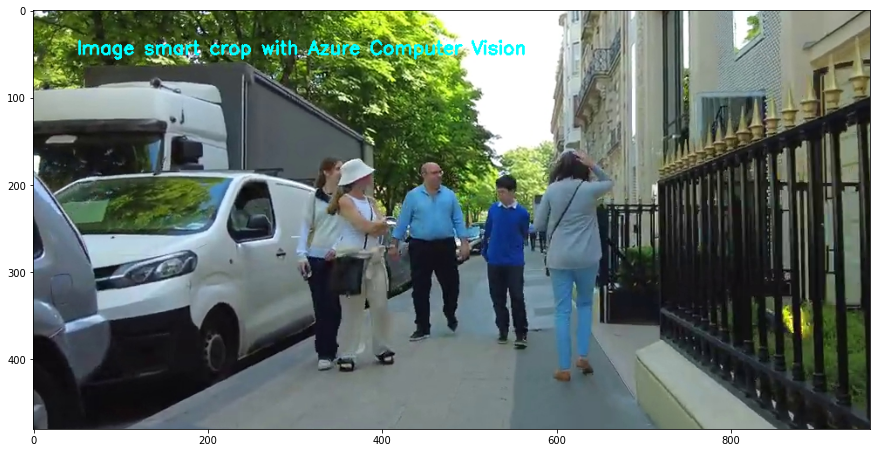

In [35]:
image = cv2.imread(sample_image)

x = crop["values"][0]["boundingBox"]["x"]
y = crop["values"][0]["boundingBox"]["y"]
width = crop["values"][0]["boundingBox"]["w"]
height = crop["values"][0]["boundingBox"]["h"]

# Crop the image using the bounding box coordinates
cropped_image = image[y : y + height, x : x + width]

cv2.putText(
    cropped_image,
    "Image smart crop with Azure Computer Vision",
    (50, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.7,
    (255, 255, 0),
    2,
)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### Objects

In [36]:
objects = results.json()["objectsResult"]["values"]
objects

[{'boundingBox': {'x': 477, 'y': 332, 'w': 80, 'h': 195},
  'tags': [{'name': 'person', 'confidence': 0.614}]},
 {'boundingBox': {'x': 1, 'y': 549, 'w': 78, 'h': 153},
  'tags': [{'name': 'Tire', 'confidence': 0.654}]},
 {'boundingBox': {'x': 362, 'y': 322, 'w': 100, 'h': 247},
  'tags': [{'name': 'person', 'confidence': 0.638}]},
 {'boundingBox': {'x': 633, 'y': 296, 'w': 88, 'h': 285},
  'tags': [{'name': 'person', 'confidence': 0.774}]},
 {'boundingBox': {'x': 6, 'y': 290, 'w': 165, 'h': 400},
  'tags': [{'name': 'car', 'confidence': 0.572}]},
 {'boundingBox': {'x': 655, 'y': 0, 'w': 625, 'h': 712},
  'tags': [{'name': 'house', 'confidence': 0.626}]},
 {'boundingBox': {'x': 11, 'y': 0, 'w': 594, 'h': 413},
  'tags': [{'name': 'tree', 'confidence': 0.502}]},
 {'boundingBox': {'x': 11, 'y': 242, 'w': 444, 'h': 415},
  'tags': [{'name': 'Van', 'confidence': 0.698}]}]

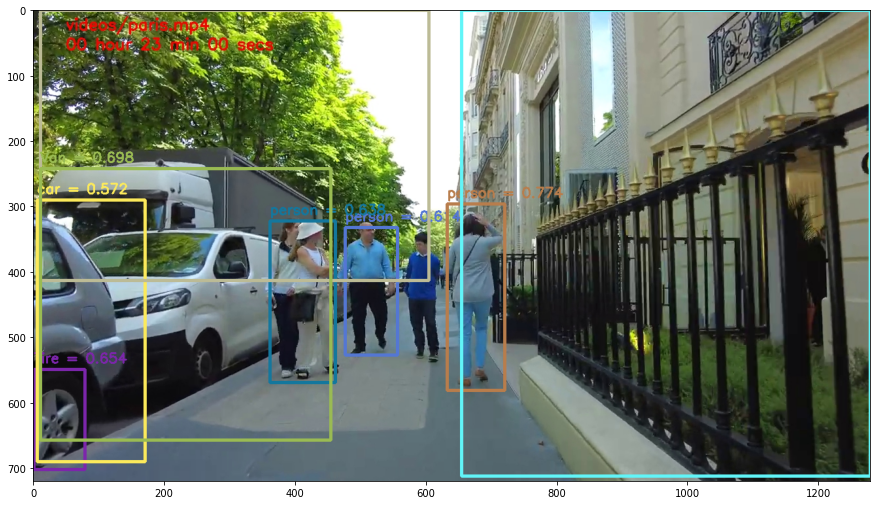

In [37]:
image = cv2.imread(sample_image)

for item in objects:
    tags = item["tags"]

    for tag in tags:
        tag_name = tag["name"]
        conf = tag["confidence"]

    col1 = random.randint(0, 255)
    col2 = random.randint(0, 255)
    col3 = random.randint(0, 255)

    x = item["boundingBox"]["x"]
    y = item["boundingBox"]["y"]
    w = item["boundingBox"]["w"]
    h = item["boundingBox"]["h"]

    text = tag_name + " = " + str(conf)
    cv2.rectangle(image, (x, y), (x + w, y + h), 
                  (col1, col2, col3), 3)
    cv2.putText(
        image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
        0.7, (col1, col2, col3), 2
    )

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Persons

In [38]:
people = results.json()["peopleResult"]["values"]
people

[{'boundingBox': {'x': 462, 'y': 321, 'w': 95, 'h': 207},
  'confidence': 0.9066460728645325},
 {'boundingBox': {'x': 625, 'y': 307, 'w': 97, 'h': 269},
  'confidence': 0.8996671438217163},
 {'boundingBox': {'x': 565, 'y': 336, 'w': 62, 'h': 203},
  'confidence': 0.8909967541694641},
 {'boundingBox': {'x': 353, 'y': 315, 'w': 65, 'h': 249},
  'confidence': 0.8457574844360352},
 {'boundingBox': {'x': 394, 'y': 318, 'w': 79, 'h': 243},
  'confidence': 0.7550387978553772},
 {'boundingBox': {'x': 1179, 'y': 326, 'w': 42, 'h': 188},
  'confidence': 0.35910823941230774},
 {'boundingBox': {'x': 620, 'y': 391, 'w': 15, 'h': 34},
  'confidence': 0.035601865500211716},
 {'boundingBox': {'x': 623, 'y': 360, 'w': 19, 'h': 65},
  'confidence': 0.0029450077563524246},
 {'boundingBox': {'x': 1185, 'y': 0, 'w': 55, 'h': 23},
  'confidence': 0.0028583768289536238},
 {'boundingBox': {'x': 628, 'y': 391, 'w': 17, 'h': 43},
  'confidence': 0.0025767425540834665},
 {'boundingBox': {'x': 1131, 'y': 0, 'w': 

In [41]:
nbpersons = 0
minconf = 0.2

for item in people:
    confidence = item["confidence"]

    if confidence >= minconf:
        bounding_box = item["boundingBox"]
        x = bounding_box["x"]
        y = bounding_box["y"]
        w = bounding_box["w"]
        h = bounding_box["h"]

        print(
            nbpersons + 1,
            f"Person with confidence = {confidence:.2f}\nx = {x} y = {y} w = {w} h = {h}\n",
        )
        nbpersons += 1

1 Person with confidence = 0.91
x = 462 y = 321 w = 95 h = 207

2 Person with confidence = 0.90
x = 625 y = 307 w = 97 h = 269

3 Person with confidence = 0.89
x = 565 y = 336 w = 62 h = 203

4 Person with confidence = 0.85
x = 353 y = 315 w = 65 h = 249

5 Person with confidence = 0.76
x = 394 y = 318 w = 79 h = 243

6 Person with confidence = 0.36
x = 1179 y = 326 w = 42 h = 188



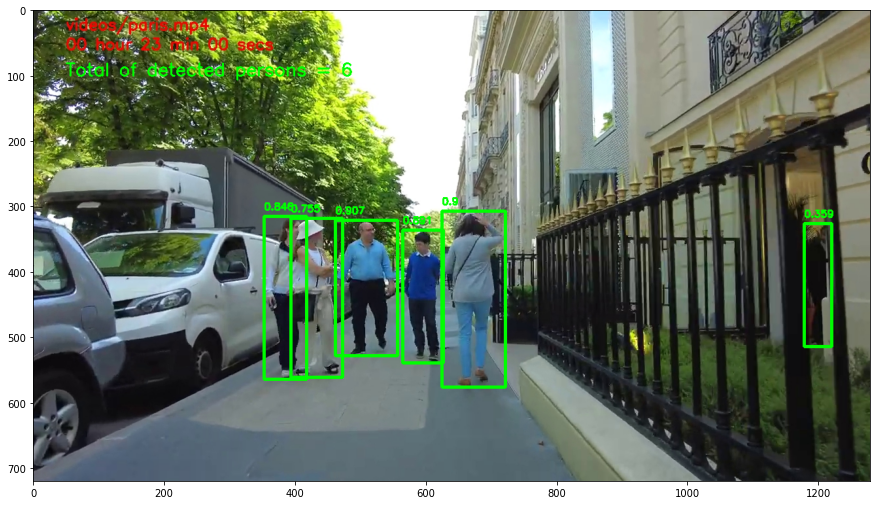

In [42]:
image = cv2.imread(sample_image)

for item in people:
    confidence = item["confidence"]

    if confidence >= minconf:
        bounding_box = item["boundingBox"]
        x = bounding_box["x"]
        y = bounding_box["y"]
        w = bounding_box["w"]
        h = bounding_box["h"]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        text = str(round(confidence, 3))
        cv2.putText(
            image,
            "Total of detected persons = " + str(nbpersons),
            (50, 100),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (0, 255, 0),
            2,
        )
        cv2.putText(
            image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
            (0, 255, 0), 2
        )

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

> In the next notebook we will do some image analysis